<h1 align='center' style="color: blue;">Individual Project - Fall 2021</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

In [1]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\tarak\anaconda3\lib\site-packages (2.7.0)


You can also check the version of it using the following code.

In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

Now, it's time to load the dataset

In [182]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [183]:
X_train.shape


(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

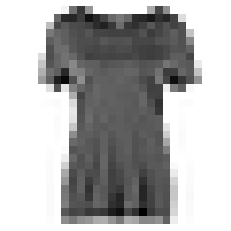

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [6]:
y_train.shape

(60000,)

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


Now, it's your turn,

# Task 1

In [200]:
X_train = X_train.reshape((X_train.shape[0], 28*28)) # reshapes the array to 784
X_test = X_test.reshape((X_test.shape[0], 28*28))

In [201]:
X_train.shape

(60000, 784)

# Logistic Regression 

In [202]:
import warnings
warnings.filterwarnings("ignore")

In [203]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter= 500) # creates 500 different model and finds the bestt fit for the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [204]:
y_test_hat = model.predict(X_test)

In [205]:
y_test_hat

array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_hat, normalize = True) * 100  # Gives out the accuracy score for the model 

84.02

In [207]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

Confusion Matrix
[[798   5  10  51  10   0 113   0  13   0]
 [  3 960   4  25   3   0   3   0   2   0]
 [ 21   6 731   9 141   1  79   1  11   0]
 [ 28  19  19 850  36   0  38   0  10   0]
 [  1   1 106  35 776   0  74   0   7   0]
 [  0   0   0   1   0 900   0  51  11  37]
 [134   2 119  40 117   0 567   0  21   0]
 [  0   0   0   0   0  35   0 938   0  27]
 [  8   1   9  13   4   6  19   5 935   0]
 [  0   1   0   0   0  16   1  35   0 947]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.96      0.96      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.83      0.85      0.84      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.90      0.92      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.94      0.93      1000
           

The overall accuracy by the model is 84%, with this accuracy score we can say that the model has performed well. But by looking at the precision and recall value for all the categorries we can say that the model has performed extremely well is classifying categories of 1,5,7,8,9 as their precision and recall value is above 90%, which means logisitic model was clearly able to identify the categories among the retrived instances and while  the recall value tells the percentage of relevant categories that were retrived.

# Naive Bayes 

In [208]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred_hat = model.predict(X_test)


In [209]:
accuracy_score(y_test,y_pred_hat, normalize = True) * 100 

58.56

In [210]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_hat))
print(classification_report(y_test,y_pred_hat))

Confusion Matrix
[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           

The GaussianNB model is performed poorly when compared to logistic regression model. In order to tune the model there no hyperparameter. The overall accuracy rate for the model is 58%, the Classification report shows the model classification capability. Hence GaussinNB model is not a good prediction model.

# KNN Model

In [211]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=10) # n_neighbors is a hyperparameter 
model3.fit(X_train, y_train)
y_knn_hat = model3.predict(X_test)

In [212]:
print('The accuracy score is ',accuracy_score(y_test,y_knn_hat,normalize=True)*100)

The accuracy score is  85.15


In [213]:
print(classification_report(y_test,y_knn_hat))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.72      0.81      0.76      1000
           3       0.91      0.87      0.89      1000
           4       0.78      0.76      0.77      1000
           5       1.00      0.81      0.89      1000
           6       0.64      0.56      0.60      1000
           7       0.87      0.97      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.89      0.96      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



KNN is lazy learner and it will take lot of computation time.

The accuracy score for the model is 85.15 and has performed well when compared to Logistic Regression Model and Gaussina Naive Bayes. For the Category 5 the precesion rate is 1.00, which means the model was able to classify the categories correctly among the retrived instances. The recall and preision rate for category 1 is high when compared to above models.

# Decision Tree Classifier 

In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

model4 = DecisionTreeClassifier()

param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9]} # hyperparameter for grid search cv 
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True) # K-fold Cross validation for Grid search Cv
grid = GridSearchCV(model4, param_grid, cv = cv, scoring='accuracy',return_train_score=True) # find the best maximum depth for the model
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='accuracy')

In [215]:
print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'max_depth': 9}
Best Cross Vlidation Score: 0.8029499999999998


In [216]:
# Therefore by choosing the maximum depth as 9:

model4 = DecisionTreeClassifier(max_depth=9, random_state=0)
model4.fit(X_train,y_train)
y_dec_pred = model4.predict(X_test)
print('The accuracy score is ',accuracy_score(y_test,y_dec_pred,normalize=True)*100)

The accuracy score is  79.74


In [217]:
print(classification_report(y_test,y_dec_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1000
           1       0.99      0.92      0.95      1000
           2       0.64      0.68      0.66      1000
           3       0.80      0.81      0.80      1000
           4       0.61      0.71      0.66      1000
           5       0.93      0.87      0.90      1000
           6       0.56      0.49      0.52      1000
           7       0.85      0.93      0.89      1000
           8       0.92      0.89      0.90      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



The Decision tree classifier model has underperformed when compared to Logistic Regression model and Knn model, but has classified well when compared to the Gaussian Naive Model. Using Grid search Cv we were able to use optimal hyperparameter in order to increase the model accuracy. The model was able to classify the category 1 with good precesion score of 0.99 and recall value for 0.92, but the model has underformed for classifying category 6, with prrecision and recall value 0.56 and 0.49 respectively. 

# Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators = 1000, random_state = 0)
model5.fit(X_train,y_train)

y_rand_hat = model5.predict(X_test)
print('The accuracy score is ',accuracy_score(y_test,y_rand_hat,normalize=True)*100)

The accuracy score is  87.94


In [107]:
print(classification_report(y_test,y_rand_hat))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.82      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.60      0.66      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



The Random Forest Classifier has outperformed all the above models and has a good accuracy score of 87.94. The precision score for category 1 is same and has increased the recall value. The model has also performed well in classifying the category 6 when compared to other supervised learning model. 

# Neural Network

In [74]:
from sklearn.neural_network import MLPClassifier

model6 = MLPClassifier(solver='adam',random_state=0)
model6.fit(X_train,y_train)

y_neu_hat = model6.predict(X_test)
print('The accuracy score is ',accuracy_score(y_test,y_neu_hat,normalize=True)*100)

The accuracy score is  85.28


In [75]:
print(classification_report(y_test,y_neu_hat))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.66      0.84      0.74      1000
           3       0.82      0.89      0.85      1000
           4       0.77      0.71      0.74      1000
           5       0.95      0.95      0.95      1000
           6       0.67      0.60      0.63      1000
           7       0.93      0.92      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



The reason why i choose adam classifier is because it works well with large dataset.It also adaptively select seperate learning rate for each parameter. Learning rates are automatically adjusted for adam whereas for other solver it require fine tuning and performance is less sensitive. The model has performed well with an accuracy of 85.28. whereas the precesion and recall score for Categoried 1,5,8,9 is above 90% and overall precesion and recall rate is 85% and 86% respectively.

# Best Model - Random Classifier Model 

From above performed model we can say that Randomforest Classifier has out performed every other model and was able to get an accuracy score to 87%, we can also say that the model might perform well with fine tuning by increasing the size of the n_estimator. 

# Task 2

In [125]:
from PIL import Image
import glob
import os, os.path


path = r'C://Users/tarak/Documents/images' 

img = [] # creates an empty list 
for file in os.listdir(path):
    img.append(Image.open(os.path.join(path,file))) # appends the image to the empty list 

In [126]:
res_img = []
for i in img:
    i.show()
    image = img1.resize((28,28))  # reshapes the size of the image 
    res_img.append(image) # Then appends again to the empty list 

In [146]:
gray_scale = [] # 

for i in res_img:
    img1 = i.convert("L") # grey scales the image 
    gray_scale.append(img) # appends the image to empty list 
    

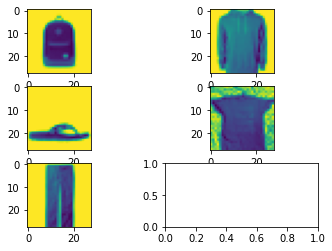

In [148]:
# plots the image in subplots.

fig, axr = plt.subplots(3,2)

axr[0,0].imshow(res_img[0])
axr[0,1].imshow(res_img[1])
axr[1,0].imshow(res_img[2])
axr[1,1].imshow(res_img[3])
axr[2,0].imshow(res_img[4])


In [196]:
import numpy as np

values_a = np.array([])

path = r'C://Users/tarak/Documents/images'


for file in os.listdir(path):
    f_img = Image.open(os.path.join(path,file))
    img= f_img.resize((28,28))
    img1 = img.convert("L")
    numpydata = np.array(img)
    values_a = np.append(values_a, numpydata)

In [223]:
a = values_a.reshape(-1,1)
a.shape

(11760, 1)